## About the Data

Dataset is from: https://snap.stanford.edu/data/wiki-Vote.html

Dataset information:

Wikipedia is a free encyclopedia written collaboratively by volunteers around the world. A small part of Wikipedia contributors are administrators, who are users with access to additional technical features that aid in maintenance. In order for a user to become an administrator a Request for adminship (RfA) is issued and the Wikipedia community via a public discussion or a vote decides who to promote to adminship. Using the latest complete dump of Wikipedia page edit history (from January 3 2008) we extracted all administrator elections and vote history data. This gave us 2,794 elections with 103,663 total votes and 7,066 users participating in the elections (either casting a vote or being voted on). Out of these 1,235 elections resulted in a successful promotion, while 1,559 elections did not result in the promotion. About half of the votes in the dataset are by existing admins, while the other half comes from ordinary Wikipedia users.

The network contains all the Wikipedia voting data from the inception of Wikipedia till January 2008. Nodes in the network represent wikipedia users and a directed edge from node i to node j represents that user i voted on user j.

## Imports

In [21]:
import os
import requests
import networkx as nx
import gzip
import pandas as pd
import numpy as np #import numpy for ...
import community #import community (https://pypi.python.org/pypi/python-louvain/0.3)
#force drawing of graphs inline for ipython notebook
%matplotlib inline
import matplotlib.pyplot as plt #import matplotlib for plotting/drawing grpahs
import operator #standard python library used for sorting
import random

## Get the Data

In [ ]:
# URL of the dataset (replace this with the actual URL if available)
url = 'https://snap.stanford.edu/data/wiki-Vote.txt.gz'
fname = os.path.basename(url)

# Download dataset if not already present
if not os.path.isfile(fname):
    print(f"Downloading...\n{url}")
    r = requests.get(url, allow_redirects=True)
    with open(fname, 'wb') as file:
        file.write(r.content)
else:
    print(f"Already downloaded:\n{url}")

Downloading...
https://snap.stanford.edu/data/wiki-Vote.txt.gz


## Load the Data

In [ ]:
# Load the dataset into a directed graph using networkx
G = nx.DiGraph()

with gzip.open(fname, 'rt') as file:
    for line in file:
        if line.startswith('#'):
            continue  # Skip comments
        u, v = map(int, line.split())
        G.add_edge(u, v)


N = G.order() #number of nodes
L = G.size() #number of edges

print("Nodes: ", N)
print("Edges: ", L)


Nodes:  7115
Edges:  103689


## Node Degrees

In [ ]:
node_degrees = dict(G.degree())
print("Node Degrees:")
for node, degree in node_degrees.items():
    print(f"Node {node}: Degree {degree}")


Streaming output truncated to the last 5000 lines.
Node 461: Degree 4
Node 462: Degree 4
Node 463: Degree 6
Node 3939: Degree 6
Node 3942: Degree 12
Node 467: Degree 12
Node 468: Degree 1
Node 164: Degree 8
Node 472: Degree 1
Node 476: Degree 1
Node 479: Degree 8
Node 480: Degree 1
Node 481: Degree 1
Node 486: Degree 1
Node 473: Degree 1
Node 489: Degree 5
Node 490: Degree 1
Node 492: Degree 1
Node 493: Degree 3
Node 494: Degree 3
Node 497: Degree 2
Node 498: Degree 2
Node 499: Degree 14
Node 501: Degree 10
Node 502: Degree 4
Node 504: Degree 1
Node 507: Degree 1
Node 513: Degree 4
Node 511: Degree 3
Node 509: Degree 1
Node 516: Degree 1
Node 519: Degree 1
Node 520: Degree 1
Node 525: Degree 7
Node 521: Degree 5
Node 522: Degree 1
Node 523: Degree 1
Node 445: Degree 4
Node 527: Degree 1
Node 528: Degree 1
Node 531: Degree 1
Node 530: Degree 7
Node 529: Degree 1
Node 534: Degree 4
Node 536: Degree 5
Node 539: Degree 2
Node 540: Degree 1
Node 541: Degree 3
Node 542: Degree 7
Node 543: De

## Average Degree

In [ ]:
# Average Degree
degrees = [d for n, d in G.degree()]
average_degree = np.mean(degrees)
print("Average Degree:", average_degree)

# Average in-degree
avg_in_degree = np.mean([d for n, d in G.in_degree()])
print("Average In-Degree:", avg_in_degree)

# Average out-degree
avg_out_degree = np.mean([d for n, d in G.out_degree()])
print("Average Out-Degree:", avg_out_degree)



Average Degree: 29.146591707659873
Average In-Degree: 14.573295853829936
Average Out-Degree: 14.573295853829936


## Average Path Length

In [ ]:
# Average Path Length for Largest Weakly Connected Component
largest_wcc = max(nx.weakly_connected_components(G), key=len)
G_largest_wcc = G.subgraph(largest_wcc).copy()


In this situation, **nx.average_shortest_path_length** can't be used as it requires a strongly connected directed graph (i.e., each node must be reachable from every other node), and the largest weakly connected component (WCC) in our graph is only weakly connected.

In [ ]:
# Convert the largest weakly connected component to undirected for average path length calculation
G_largest_wcc_undirected = G_largest_wcc.to_undirected()
average_path_length = nx.average_shortest_path_length(G_largest_wcc_undirected)

print("Average Path Length (Largest WCC, Undirected):", average_path_length)


Average Path Length (Largest WCC, Undirected): 3.247509990226615


## Diameter

In [ ]:
# Diameter of the Largest Weakly Connected Component
diameter = nx.diameter(G_largest_wcc_undirected)

print("Diameter (Largest WCC, Undirected):", diameter)

Diameter (Largest WCC, Undirected): 7


## Clustering Coefficient

In [ ]:
# Convert the largest weakly connected component to undirected
G_largest_wcc_undirected = G_largest_wcc.to_undirected()

# Calculate the average clustering coefficient
average_clustering_coefficient = nx.average_clustering(G_largest_wcc_undirected)

print("Average Clustering Coefficient (Largest WCC, Undirected):", average_clustering_coefficient)

Average Clustering Coefficient (Largest WCC, Undirected): 0.14187491841626332


## Centralities

### Degree Centrality and Degree Distribution

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Print general degree centrality for all nodes, sorted by centrality value
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("\nDegree Centrality for all nodes:")
for node, centrality in sorted_degree_centrality:
    print(f"Node {node}: Degree Centrality {centrality:.4f}")



Streaming output truncated to the last 5000 lines.
Node 379: Degree Centrality 0.0030
Node 431: Degree Centrality 0.0030
Node 881: Degree Centrality 0.0030
Node 991: Degree Centrality 0.0030
Node 1692: Degree Centrality 0.0030
Node 524: Degree Centrality 0.0030
Node 1282: Degree Centrality 0.0030
Node 2060: Degree Centrality 0.0030
Node 2575: Degree Centrality 0.0030
Node 48: Degree Centrality 0.0030
Node 7074: Degree Centrality 0.0030
Node 3313: Degree Centrality 0.0030
Node 5639: Degree Centrality 0.0030
Node 2366: Degree Centrality 0.0030
Node 6606: Degree Centrality 0.0030
Node 201: Degree Centrality 0.0030
Node 3068: Degree Centrality 0.0030
Node 5887: Degree Centrality 0.0030
Node 193: Degree Centrality 0.0030
Node 412: Degree Centrality 0.0030
Node 2825: Degree Centrality 0.0030
Node 7874: Degree Centrality 0.0030
Node 7262: Degree Centrality 0.0030
Node 2063: Degree Centrality 0.0030
Node 7928: Degree Centrality 0.0030
Node 2488: Degree Centrality 0.0030
Node 2719: Degree Centr

Now, let's calculate those who received the most votes (shows that they are the popular candidates)

In [ ]:
# Top 10 nodes with highest in-degree (most votes received)
top_10_in_degree = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes with highest in-degree (most votes received):")
for node, degree in top_10_in_degree:
    print(f"Node {node}: In-degree {degree}")

Top 10 nodes with highest in-degree (most votes received):
Node 4037: In-degree 457
Node 15: In-degree 361
Node 2398: In-degree 340
Node 2625: In-degree 331
Node 1297: In-degree 309
Node 2565: In-degree 274
Node 762: In-degree 272
Node 2328: In-degree 266
Node 5254: In-degree 265
Node 3352: In-degree 264


### Betweenness Centrality

In [ ]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Top 10 nodes by betweenness centrality
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by betweenness centrality:", top_betweenness)


Top 10 nodes by betweenness centrality: [(2565, 0.017654409558147836), (1549, 0.016564095998753692), (15, 0.01156258726064681), (72, 0.008011822532712367), (737, 0.006134997021063534), (1166, 0.0058025468349323876), (5079, 0.005438230580659507), (2328, 0.005202347375831278), (2237, 0.004714826895715726), (28, 0.004563992520641177)]


*These top 10 nodes with high betweenness represent influential voters whose votes reflect or mediate between different factions or voting groups, impacting the outcome of elections by swaying opinions.*

### Closeness Centrality

In [ ]:
# Closeness centrality (on the largest weakly connected component)
closeness_centrality = nx.closeness_centrality(G_largest_wcc)

# Top 10 nodes by closeness centrality
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by closeness centrality:", top_closeness)


Top 10 nodes by closeness centrality: [(4037, 0.2985392599462622), (15, 0.293511230305062), (2398, 0.2929401967830677), (1549, 0.2838824682249186), (2535, 0.2818419832781087), (3089, 0.2799763130280714), (762, 0.27993467157450885), (5412, 0.2797449939744266), (2565, 0.2795396946875405), (5254, 0.2784849839951483)]


*These top 10 nodes with high closeness represent highly integrated community members whose opinions reach and potentially affect the community efficiently.*

### Eigenvector Centrality

In [ ]:
# Eigenvector centrality (on the largest weakly connected component, as it requires connected graph)
eigenvector_centrality = nx.eigenvector_centrality(G_largest_wcc)

# Top 10 nodes by eigenvector centrality
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by eigenvector centrality:", top_eigenvector)


Top 10 nodes by eigenvector centrality: [(2398, 0.1171983832471754), (4037, 0.10895543930803386), (15, 0.09817933816669923), (4191, 0.09568989575762346), (2625, 0.09552610300572519), (1549, 0.09503186906635995), (2328, 0.09483743172846111), (3089, 0.09310705125076532), (5412, 0.09050808243358636), (2066, 0.09048358862307544)]


*These top 10 nodes with high Eigenvector Centrality represent those well-known contributors or long-standing admins whose endorsements are especially meaningful. Their votes might carry significant weight and set trends for others.*

## Visualize our Network

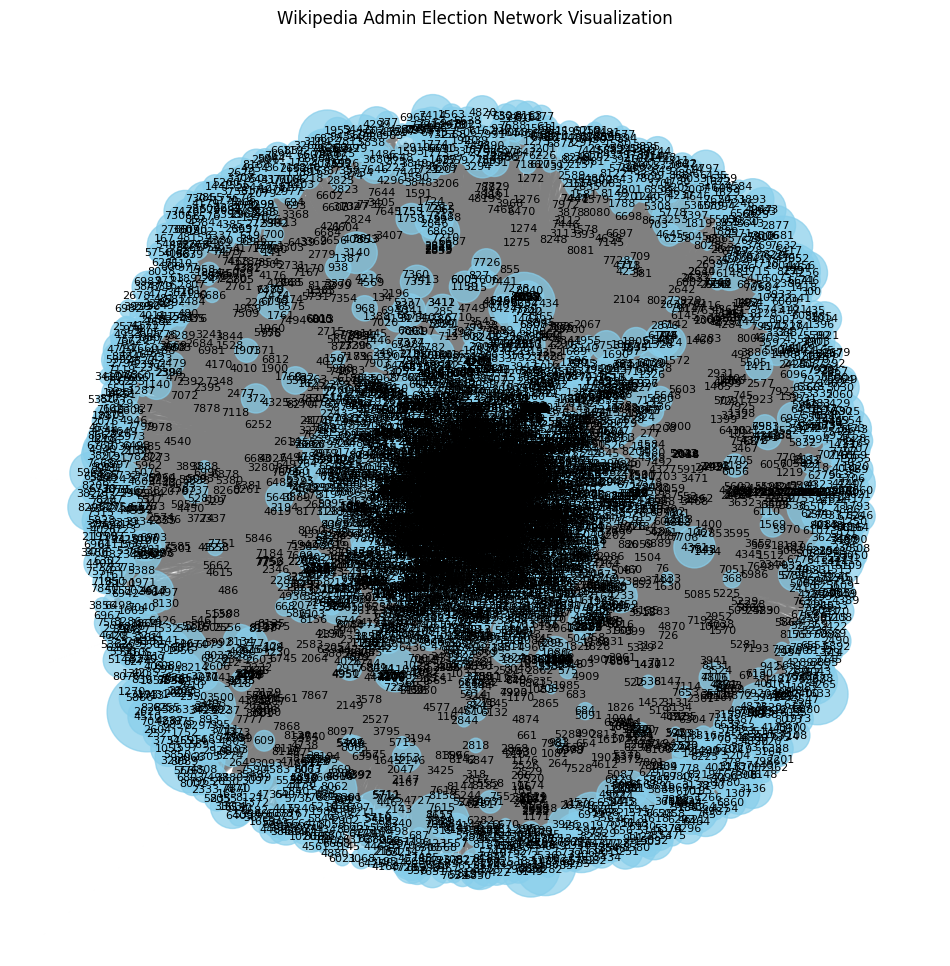

In [ ]:
pos = nx.spring_layout(G, seed=42)  # spring layout for a clear distribution

# Compute in-degrees for node sizes
in_degrees = dict(G.in_degree())
node_sizes = [in_degrees[node] * 10 for node in G.nodes()]  # scale size for better visibility

# Draw the network
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Title and display options
plt.title("Wikipedia Admin Election Network Visualization")
plt.axis('off')
plt.show()


**Visualization of subset data**

The dataset contains 7,115 nodes and 103,689 edges, representing votes for Wikipedia administratorship. Analyzing and visualizing the full network may be computationally intensive and hard to interpret visually due to its density. A sample of 500 nodes will allow us to:

Focus on a manageable subset for meaningful visualization.

Capture essential patterns without overwhelming computational resources

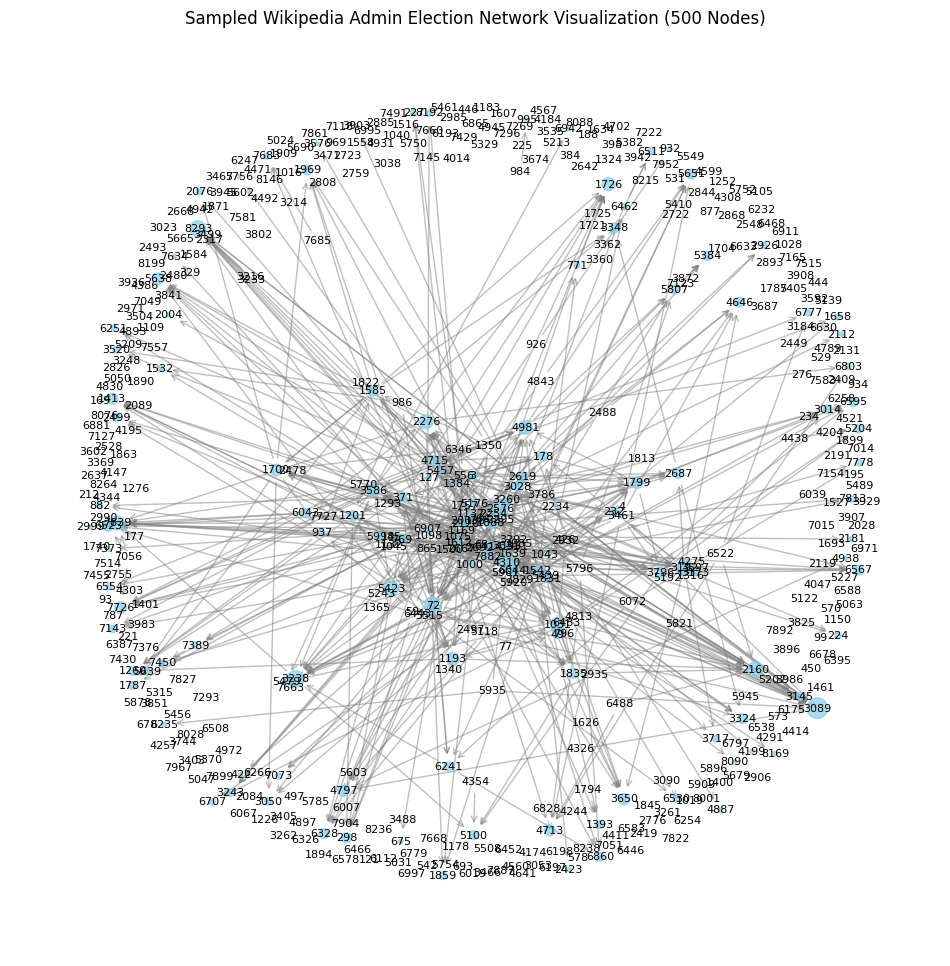

In [ ]:
sample_nodes = random.sample(list(G.nodes()), 500)
G_sample = G.subgraph(sample_nodes)  # Create a subgraph with the sampled nodes

in_degrees = dict(G_sample.in_degree())
node_sizes = [in_degrees[node] * 10 for node in G_sample.nodes()]  # Scale size for visibility

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_sample, seed=42)

nx.draw_networkx_nodes(G_sample, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G_sample, pos, arrowstyle='->', arrowsize=10, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G_sample, pos, font_size=8, font_color='black')

plt.title("Sampled Wikipedia Admin Election Network Visualization (500 Nodes)")
plt.axis('off')

plt.show()

*Side Notes*

**Layout**: spring_layout positions nodes based on repulsion, which often helps spread the nodes out for clarity.

**Node Sizes**: Nodes are sized based on in-degree (votes received), which can highlight prominent candidates in the election dataset.

**Edge Colors and Styles**: The edges are set to gray with arrows to indicate the direction of voting.

## Robustness Testing

In the case of Wikipedia admin election dataset, the testing of its robustness involves assessing how resilient the network is to node and edge removals which means evaluating how structural properties (like connectivity and path lengths) change under different attack strategies, such as removing high-degree nodes (targeted attack) or random nodes.

***Interpretation***

Random Attack Results: A more robust network will maintain a large WCC size even as a substantial fraction of nodes are removed. If the WCC size decreases slowly under random attacks, the network is resilient to random node failures.

Targeted Attack Results: If removing high-degree nodes leads to a rapid breakdown (WCC size decreases quickly), it indicates vulnerability to targeted attacks, meaning that certain users (likely influential voters or candidates) play a critical role in holding the network together.

In [ ]:
# Function to compute the largest WCC size
def largest_wcc_size(G):
    return len(max(nx.weakly_connected_components(G), key=len))

# Initial metrics
initial_wcc_size = largest_wcc_size(G)
print("Initial Largest WCC Size:", initial_wcc_size)

# Define fractions of nodes to remove
fractions = [0.05 * i for i in range(1, 11)]  # 5% to 50% in steps

Initial Largest WCC Size: 7066


In [ ]:
# Random attack with adjustment for remaining nodes
random_wcc_sizes = []
G_random = G.copy()
for fraction in fractions:
    # Calculate the sample size based on the current number of nodes left in G_random
    current_nodes = list(G_random.nodes())
    sample_size = int(fraction * len(current_nodes))
    nodes_to_remove = random.sample(current_nodes, min(sample_size, len(current_nodes)))  # ensure sample size is valid
    G_random.remove_nodes_from(nodes_to_remove)
    random_wcc_sizes.append(largest_wcc_size(G_random))


In [ ]:
# Targeted attack (by degree)
targeted_wcc_sizes = []
G_targeted = G.copy()
nodes_by_degree = sorted(G.degree(), key=lambda x: x[1], reverse=True)  # Sort by degree
for fraction in fractions:
    num_nodes = int(fraction * G.number_of_nodes())
    nodes_to_remove = [node for node, _ in nodes_by_degree[:num_nodes]]
    G_targeted.remove_nodes_from(nodes_to_remove)
    targeted_wcc_sizes.append(largest_wcc_size(G_targeted))

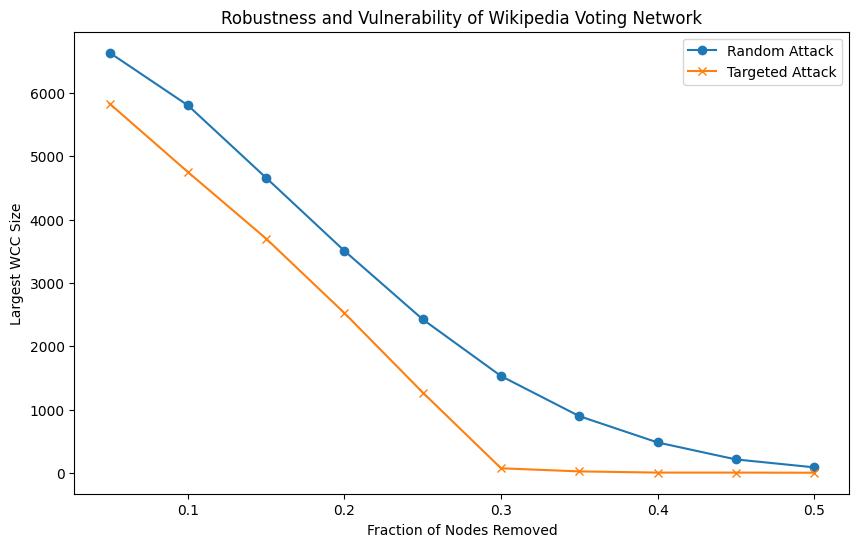

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(fractions, random_wcc_sizes, label="Random Attack", marker='o')
plt.plot(fractions, targeted_wcc_sizes, label="Targeted Attack", marker='x')
plt.xlabel("Fraction of Nodes Removed")
plt.ylabel("Largest WCC Size")
plt.title("Robustness and Vulnerability of Wikipedia Voting Network")
plt.legend()
plt.show()

***Analysis and Conclusion***

As we can observe in the Random Attack, as the network's WCC size and connectivity decrease gradually which suggests resilience, implying that the community is well-distributed and not overly depended on a few central users.

However if we look at the Targeted Attack, there's a quick breakdown at around 0.3 which implies vulnerability wherein certain highly connected users(hubs) play a crucial role (influential voters or widely supported candidates).

## Real-World Insights

The results on Random Attacks would show that if a random portion of our community became inactive – would the voting network hold together, or would it collapse? This analysis shows how the structure can handle these everyday fluctuations.

With the resuls on Targeted Attacks, it shows that removing highly connected nodes disrupts the network, identifying users who hold critical influence. This could reflect the importance of certain contributors or administrators whose participation holds the community together.